In [8]:
import pydotplus
import numpy as np
import matplotlib.pyplot as plt
import sys

from sklearn.datasets import load_iris 
from sklearn.tree import DecisionTreeClassifier

from itertools import product
from IPython.display import Image


# 1.分类练习 + 绘制散点及类别图 + 绘制决策树 

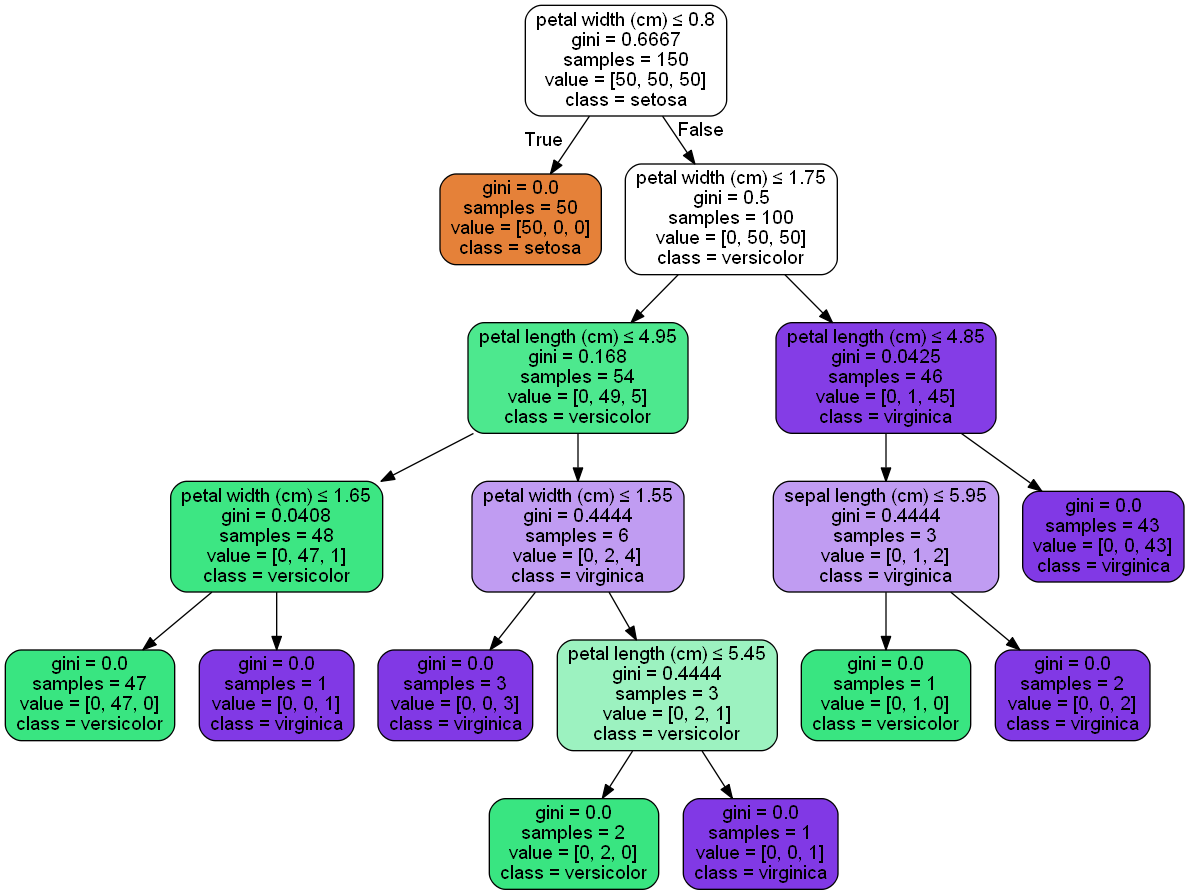

In [2]:
# -*- coding:utf-8 -*-

#加载scikit-learn自带的数据集iris，训练决策树模型clf
iris = load_iris()
clf = DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

# #将决策树模型clf存入dot文件iris.dot
# with open('iris.dot', 'w') as f:
#     f = tree.export_graphviz(clf, out_file=f)
    
from IPython.display import Image
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,
                         filled=True, rounded=True,
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [9]:
import numpy as np
np.shape(iris.data)

(150L, 4L)

In [10]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
type(iris.data)

numpy.ndarray

In [12]:
iris.data[0, :]

array([ 5.1,  3.5,  1.4,  0.2])

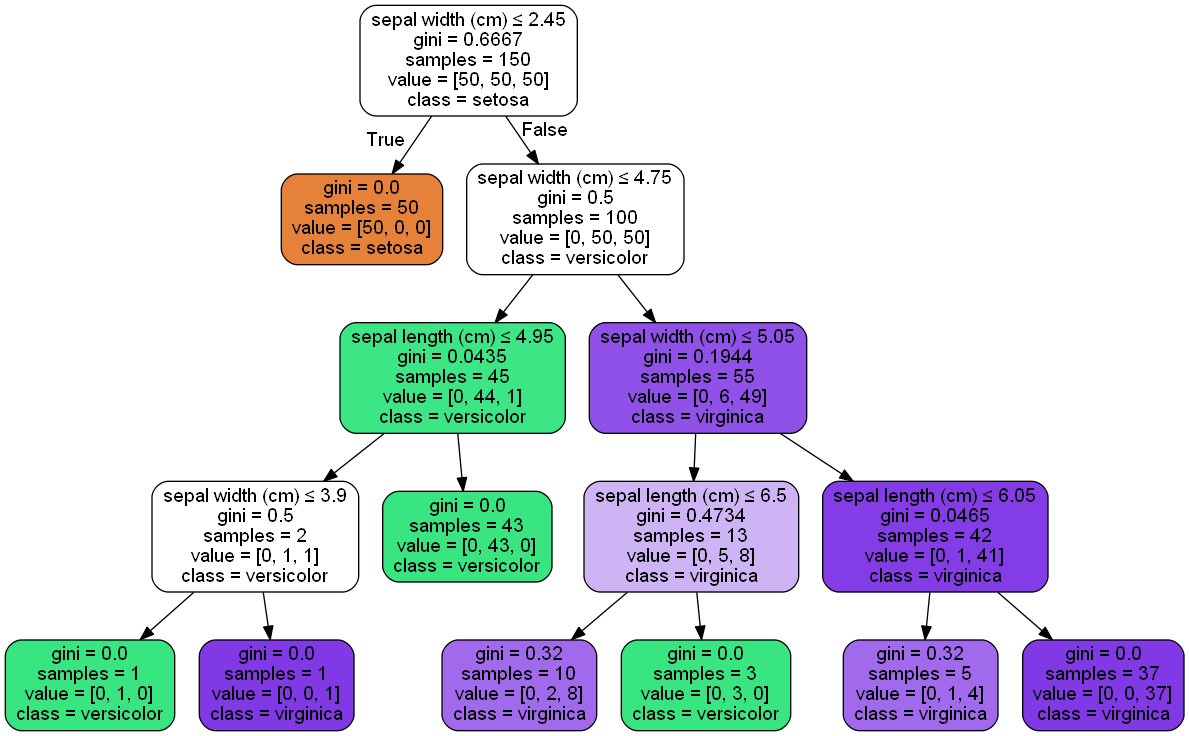

In [1]:
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# 训练模型，限制树的最大深度4
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X, y)

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris.feature_names,
                                 class_names=iris.target_names,
                                 filled=True, rounded=True,
                                 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## 再练习些分类例子

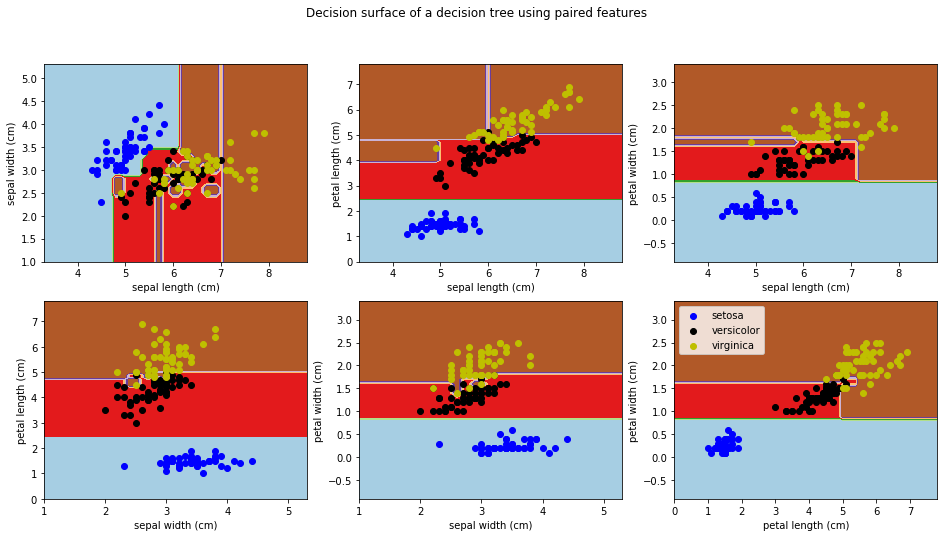

In [21]:
# Parameters
n_classes = 3
plot_colors = "bky"
plot_step = 0.02

# Load data
iris = load_iris()

plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]): # pairidx是后边各个元组的下标
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target
    
    # Train
    clf = DecisionTreeClassifier().fit(X, y)
    
    # Plot the decision bundary
    plt.subplot(2, 3, pairidx + 1)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), 
                         np.arange(y_min, y_max, 0.1))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")
    
    # Plot the training points--------尝试了下 下边的的for循环可以 直接用plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8) 实现同样的效果
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1],
                    c = color,
                    label = iris.target_names[i],
                    cmap=plt.cm.Paired)
        plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

In [3]:
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    print pairidx, pair

0 [0, 1]
1 [0, 2]
2 [0, 3]
3 [1, 2]
4 [1, 3]
5 [2, 3]


# 2.回归实例练习

In [27]:
# 热身小例子
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

array([ 0.5])

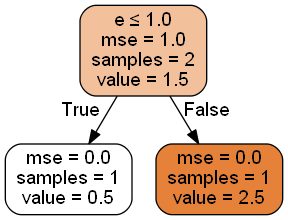

In [25]:
from IPython.display import Image
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names='tezheng',
                         class_names='leibie',
                         filled=True, rounded=True,
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## 一个正常例子

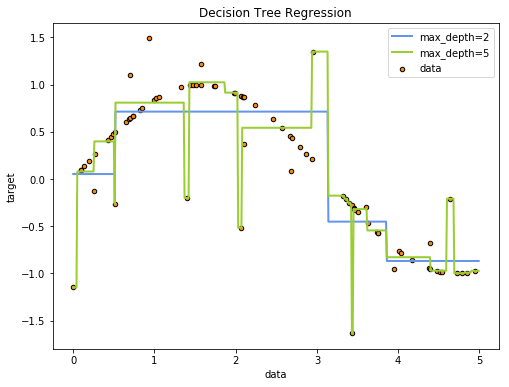

In [37]:
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, s=20, edgecolor="black",
            c = "darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen",
         label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## 多输出问题

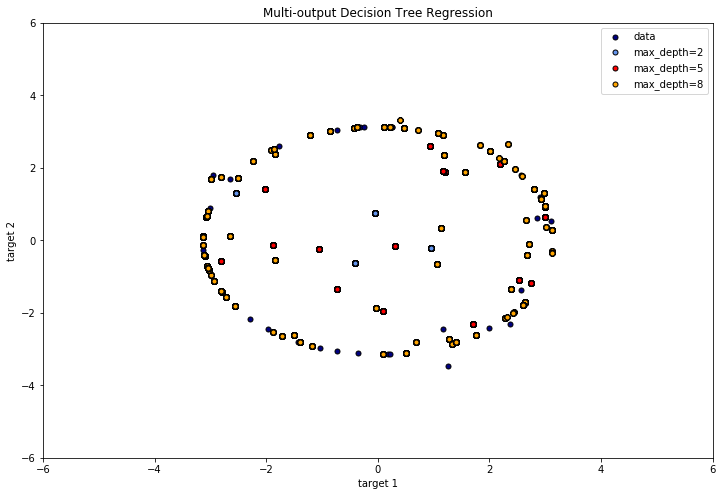

In [43]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y[::5, :] += (0.5 - rng.rand(20, 2))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

# Predict
X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# Plot the results
plt.figure(figsize=(12, 8))
s = 50
s = 25
plt.scatter(y[:, 0], y[:, 1], c="navy", s=s,
            edgecolor="black", label="data")
plt.scatter(y_1[:, 0], y_1[:, 1], c="cornflowerblue", s=s,
            edgecolor="black", label="max_depth=2")
plt.scatter(y_2[:, 0], y_2[:, 1], c="red", s=s,
            edgecolor="black", label="max_depth=5")
plt.scatter(y_3[:, 0], y_3[:, 1], c="orange", s=s,
            edgecolor="black", label="max_depth=8")
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend(loc="best")
plt.show()

In [44]:
y

array([[ 1.82569761,  2.64490159],
       [ 2.80694332,  1.41091233],
       [-2.72043225, -1.57125834],
       [-2.99372396, -0.95248164],
       [-0.85218806,  3.02380223],
       [ 2.38902829, -1.33007108],
       [-2.79534903, -1.43374621],
       [-3.07394347,  0.64844117],
       [-3.03515591,  0.81082243],
       [ 0.46676469,  3.10672418],
       [ 2.65732301,  0.56229152],
       [ 2.63212356, -1.71508891],
       [ 2.28617935, -2.15475947],
       [-3.13109169, -0.25665006],
       [ 3.09796044,  0.5217715 ],
       [ 1.25663563, -3.47458334],
       [-0.35081253, -3.1219441 ],
       [-1.02994699, -2.96796455],
       [-3.14002924,  0.09909982],
       [-3.13944098,  0.11625281],
       [ 2.37492485, -2.31010056],
       [ 0.18985749, -3.13585053],
       [ 0.26325594,  3.1305432 ],
       [ 1.99838765, -2.42405676],
       [-1.72353425, -2.62660124],
       [-2.50785749,  1.71543509],
       [-2.28076115, -2.16049369],
       [-0.72606345, -3.05653992],
       [-2.81317706,